# **Neural Networks Assignment**

# **Assignment 16(a)**

# **1.ForestFires Dataset(forestfires.csv)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

# **Import Dataset**

In [2]:
df=pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# **EDA**

**Descriptive Analysis**

In [3]:
df.shape

(517, 31)

In [4]:
#checking the missing the values
(df.isna().sum())/len(df)*100

month            0.0
day              0.0
FFMC             0.0
DMC              0.0
DC               0.0
ISI              0.0
temp             0.0
RH               0.0
wind             0.0
rain             0.0
area             0.0
dayfri           0.0
daymon           0.0
daysat           0.0
daysun           0.0
daythu           0.0
daytue           0.0
daywed           0.0
monthapr         0.0
monthaug         0.0
monthdec         0.0
monthfeb         0.0
monthjan         0.0
monthjul         0.0
monthjun         0.0
monthmar         0.0
monthmay         0.0
monthnov         0.0
monthoct         0.0
monthsep         0.0
size_category    0.0
dtype: float64

In [5]:
df.isna().any()

month            False
day              False
FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
dayfri           False
daymon           False
daysat           False
daysun           False
daythu           False
daytue           False
daywed           False
monthapr         False
monthaug         False
monthdec         False
monthfeb         False
monthjan         False
monthjul         False
monthjun         False
monthmar         False
monthmay         False
monthnov         False
monthoct         False
monthsep         False
size_category    False
dtype: bool

In [6]:
#checking the duplicates
df.duplicated().sum()

8

In [7]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(509, 31)

In [10]:
#checking datatypes
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [11]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

In [13]:
#Features Analysis

In [14]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [15]:
df.head(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small


In [16]:
df['size_category'].unique() #dependent feature

array(['small', 'large'], dtype=object)

In [17]:
df['size_category'].value_counts()

small    371
large    138
Name: size_category, dtype: int64

In [18]:
df['month'].value_counts()

aug    178
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [19]:
df['day'].value_counts()

sun    94
fri    83
sat    82
mon    74
tue    63
thu    60
wed    53
Name: day, dtype: int64

In [20]:
#copy of data
df_copy=df.copy()

In [21]:
#Features Selection
#removing dummies and selecting only important features
df.drop(df.columns[11:30],axis=1,inplace=True)

In [22]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [23]:
df.shape

(509, 12)

In [24]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  size_category  509 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 51.7+ KB


# **Correlation**

In [26]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


# **Visualization**

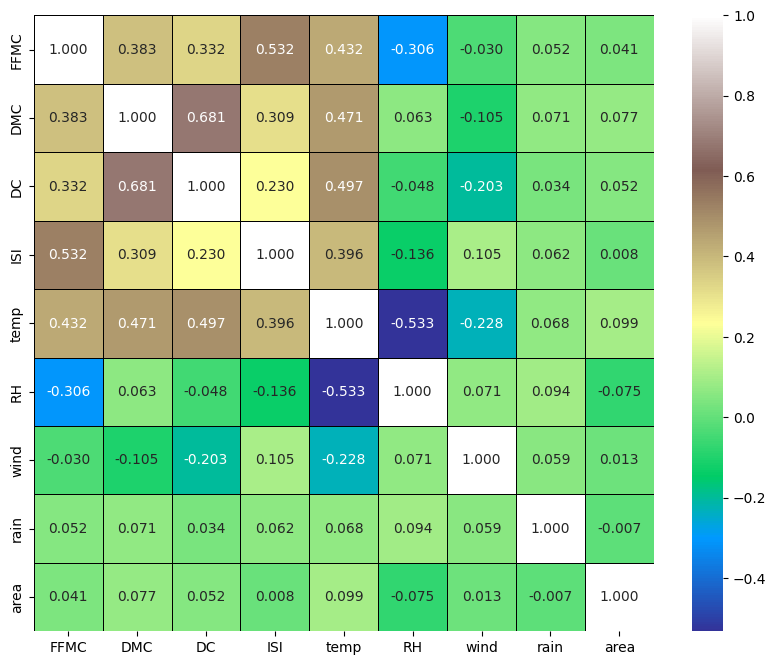

In [27]:
#heat map
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='terrain',fmt='.3f',linewidth=0.5,linecolor='black')
plt.show()

<Figure size 1000x800 with 0 Axes>

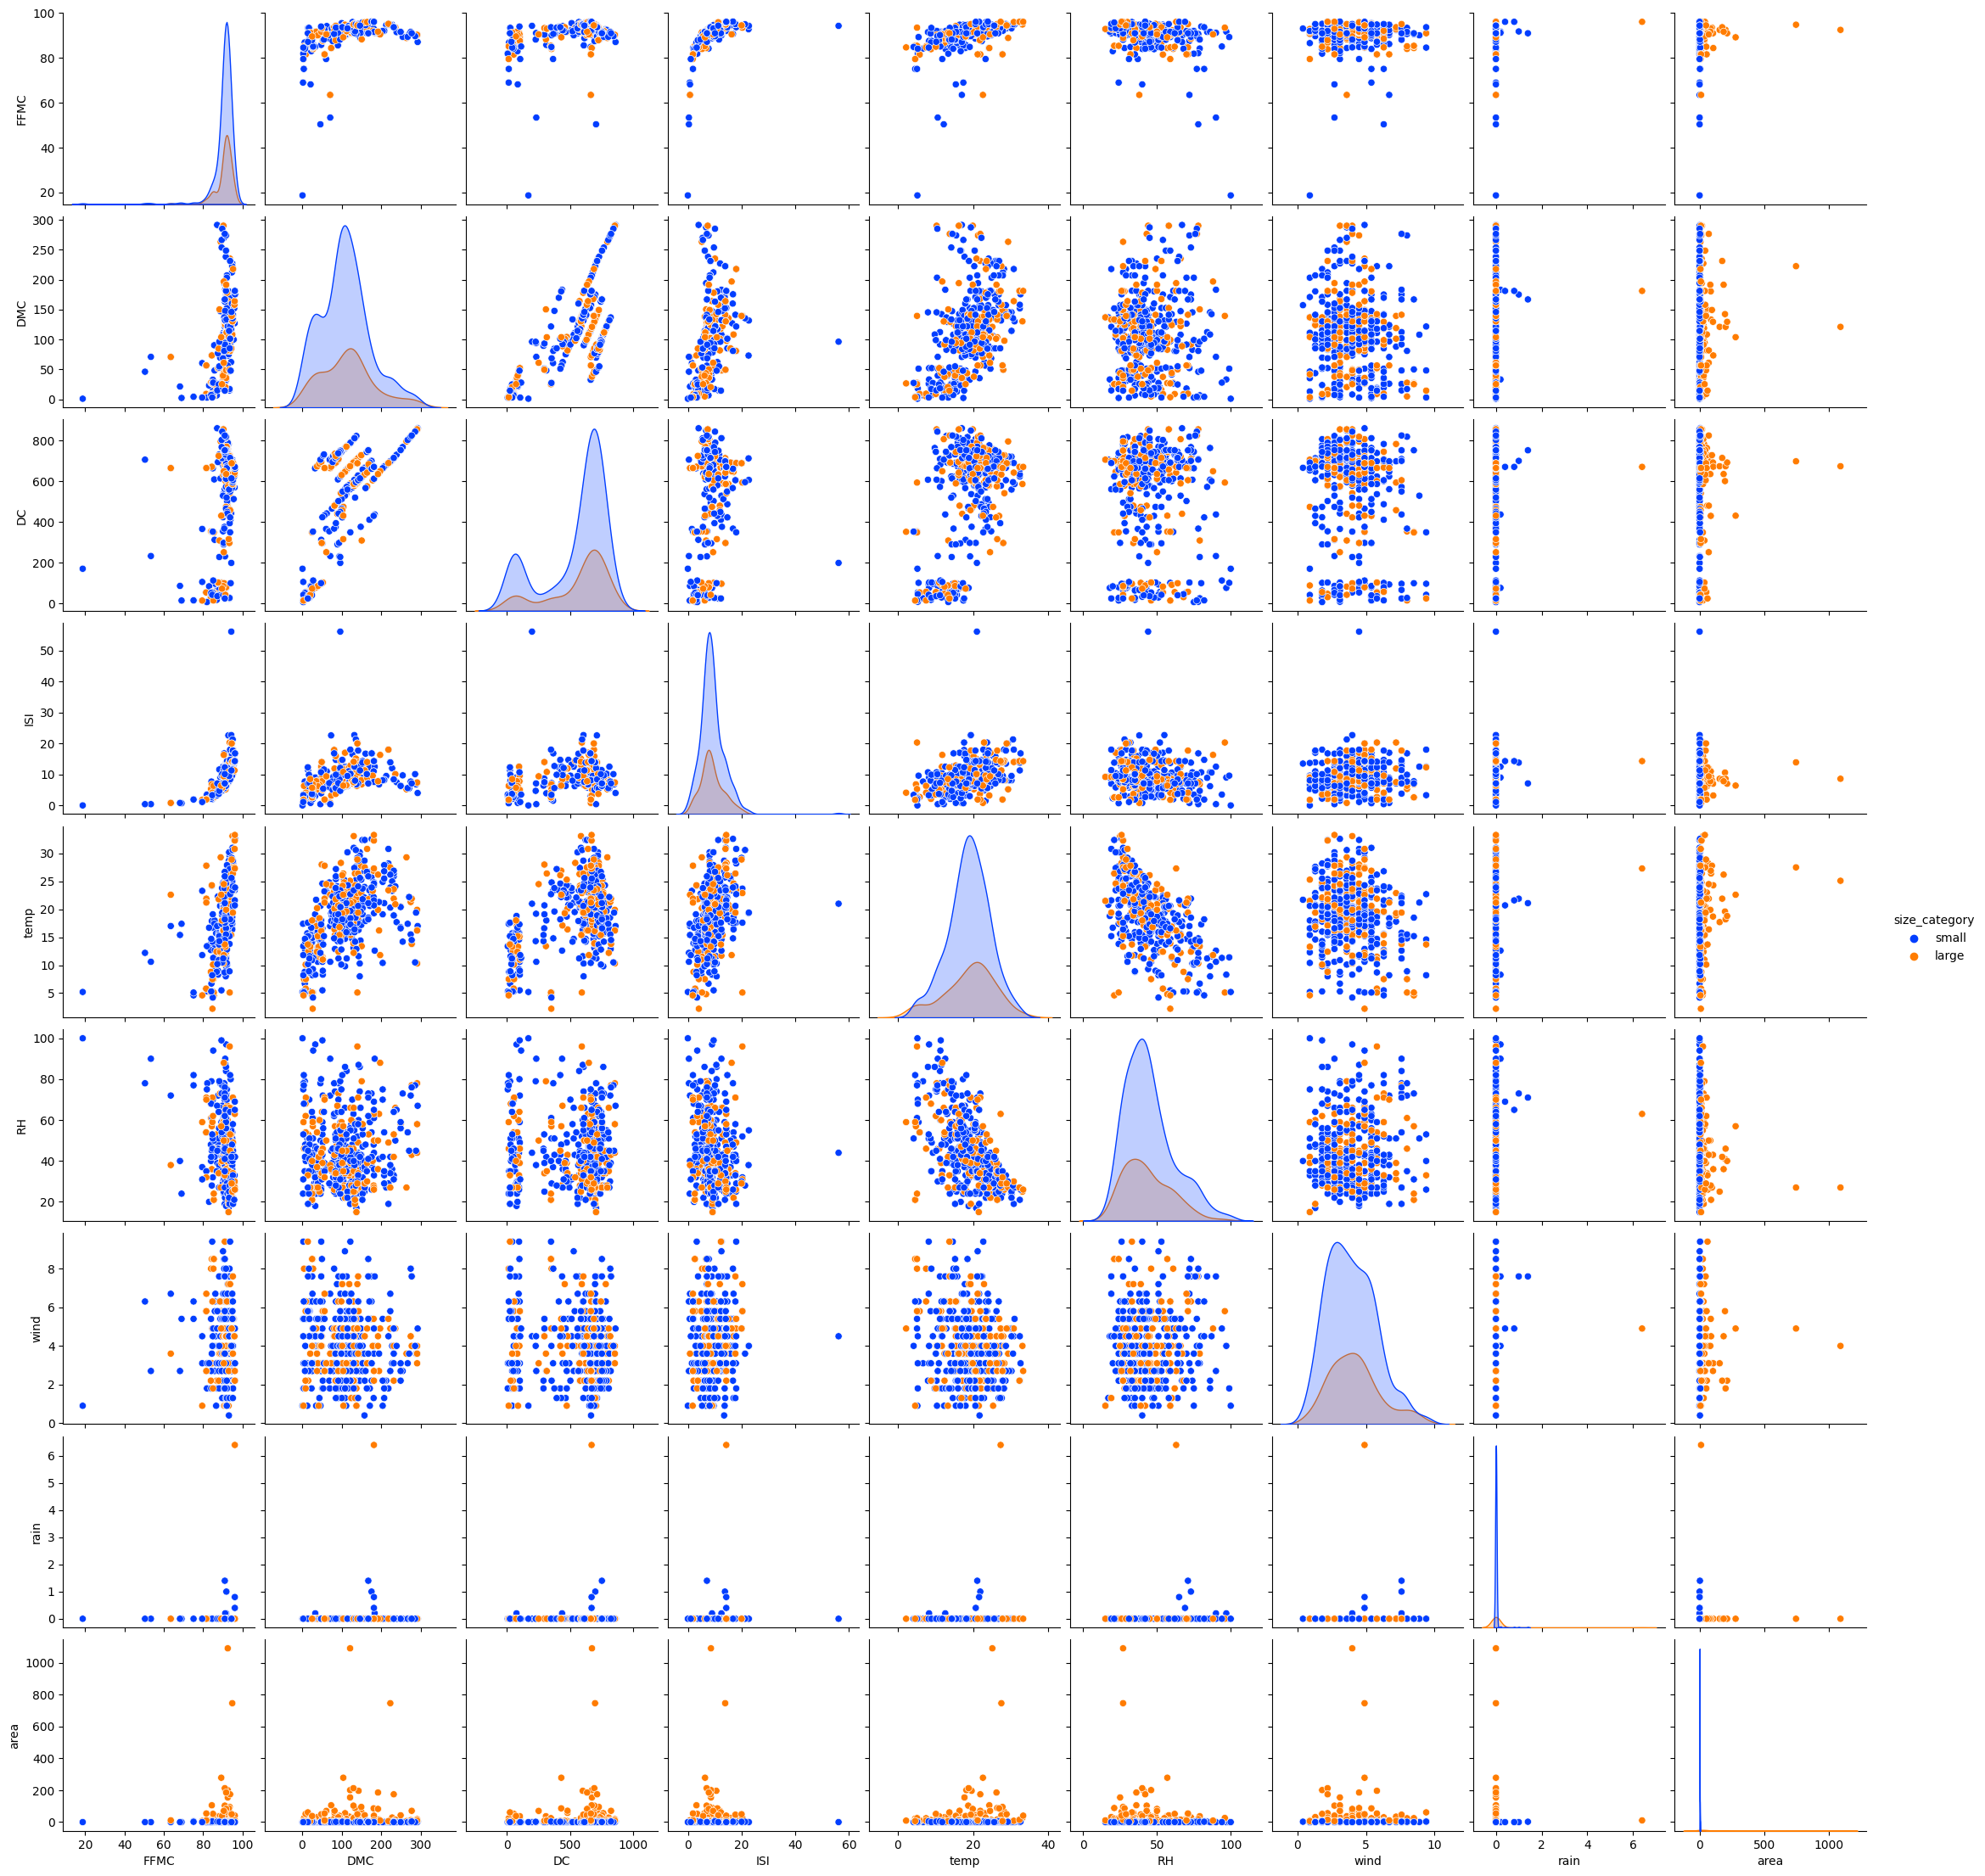

In [28]:
#pairplot
plt.figure(figsize=(10,8))
sns.pairplot(df,hue='size_category',palette='bright')
plt.show()

# **Univariate plot**

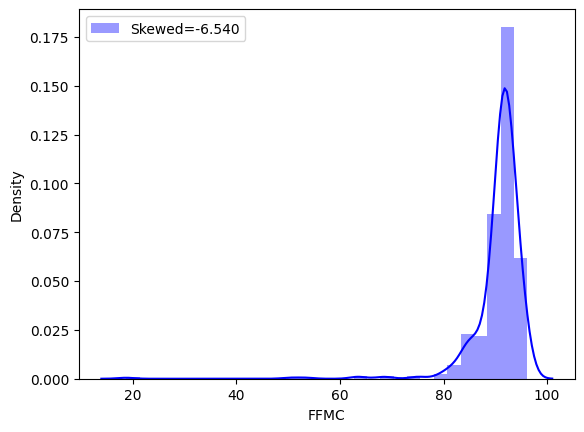

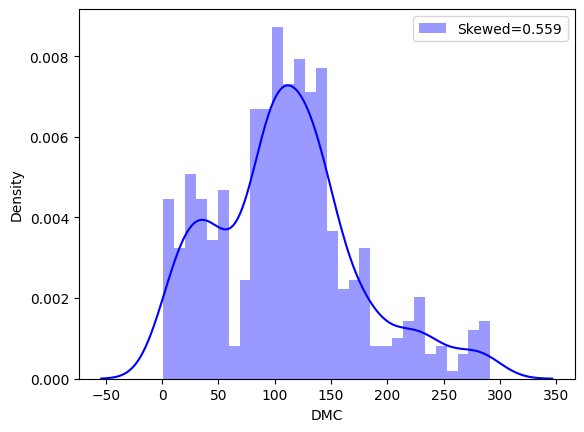

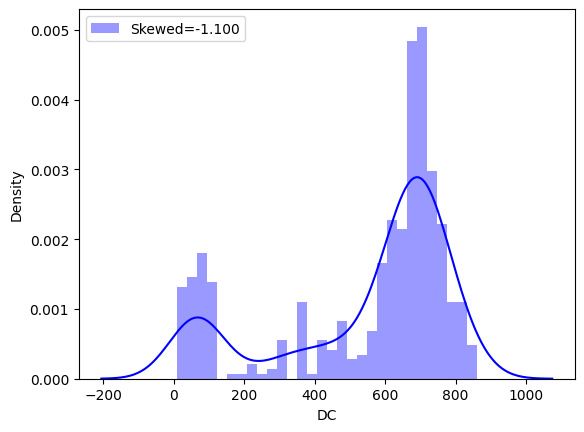

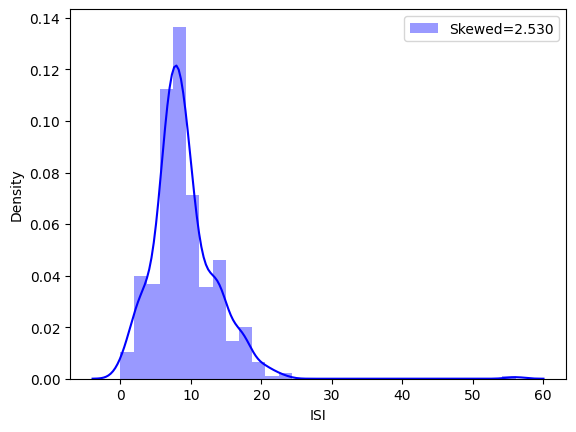

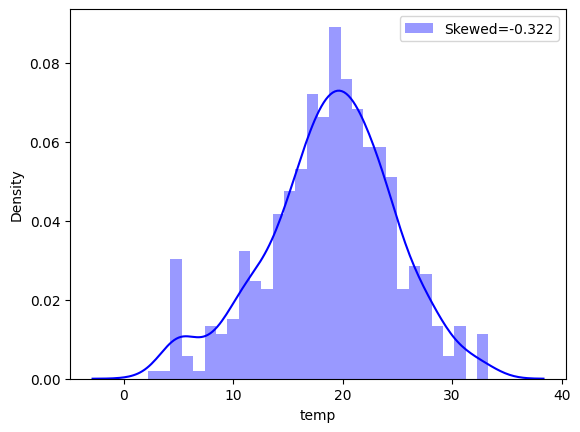

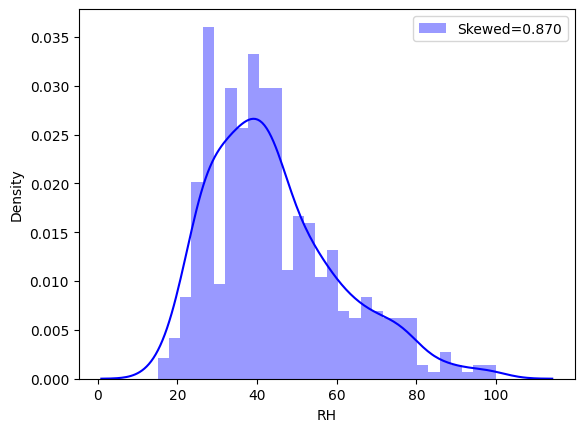

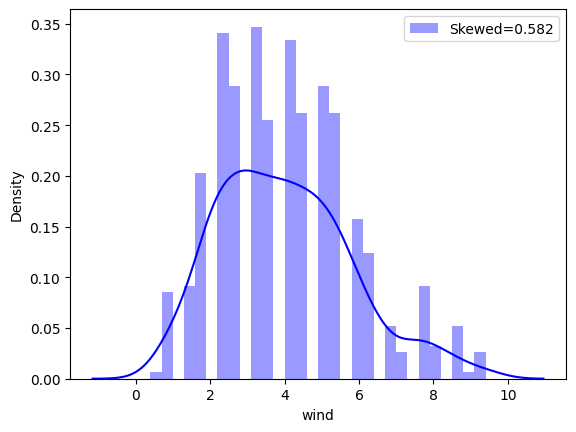

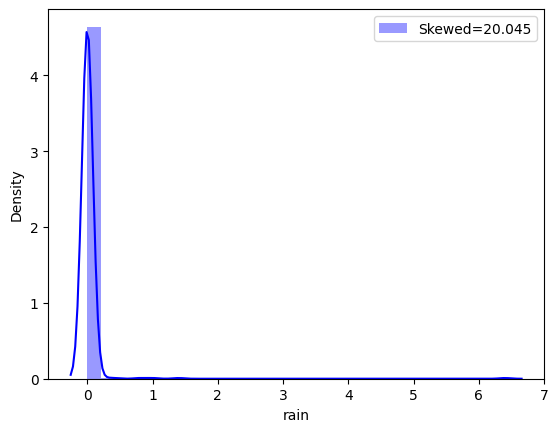

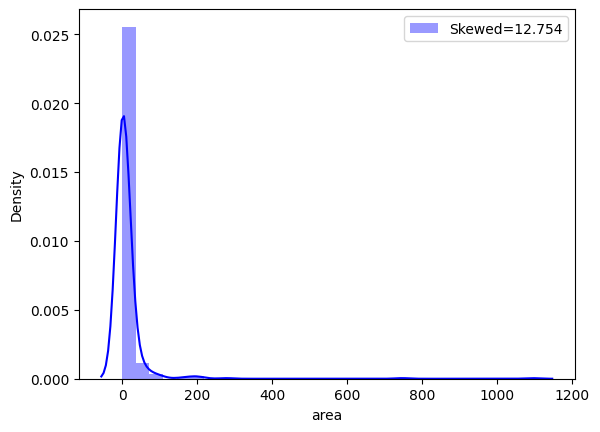

In [29]:
#univariate plot
feat=df.iloc[:,2:-1]
for f in feat:
  skew=df[f].skew()
  sns.distplot(df[f],label='Skewed=%.3f'%(skew),bins=30,color='blue')
  plt.legend()
  plt.show()

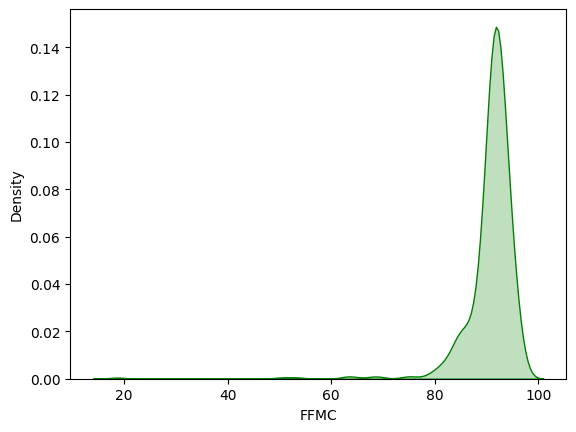

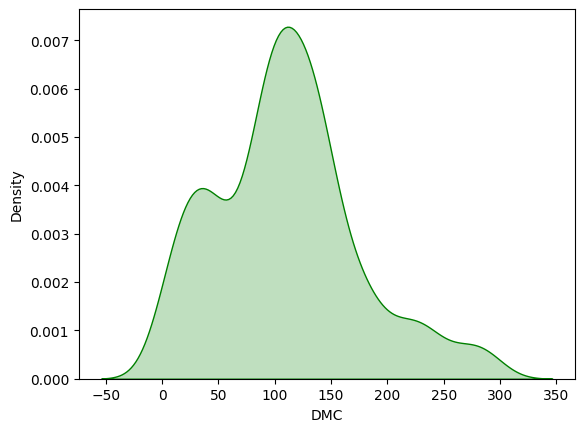

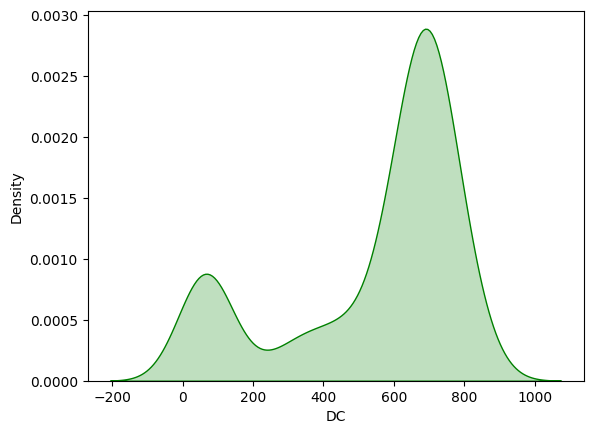

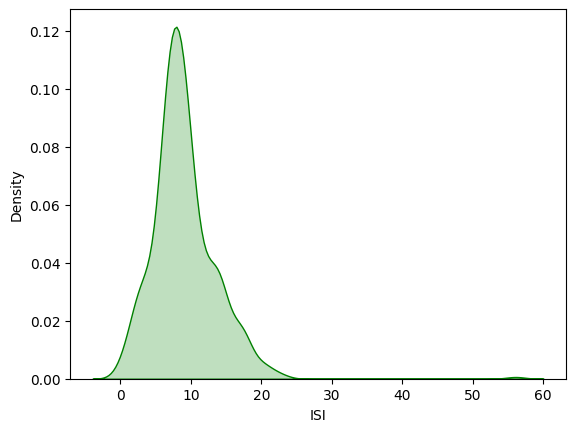

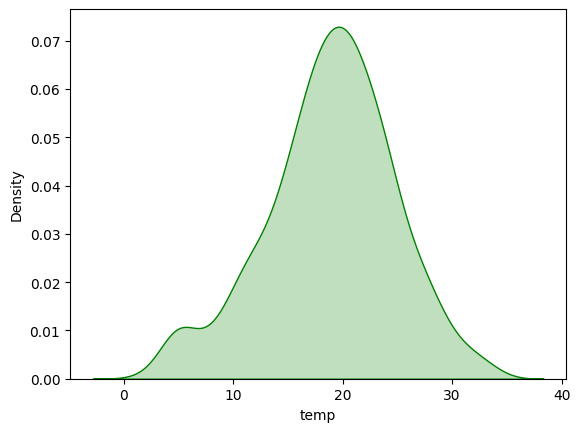

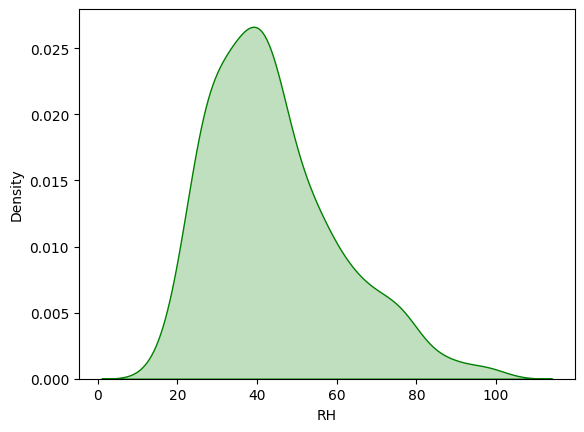

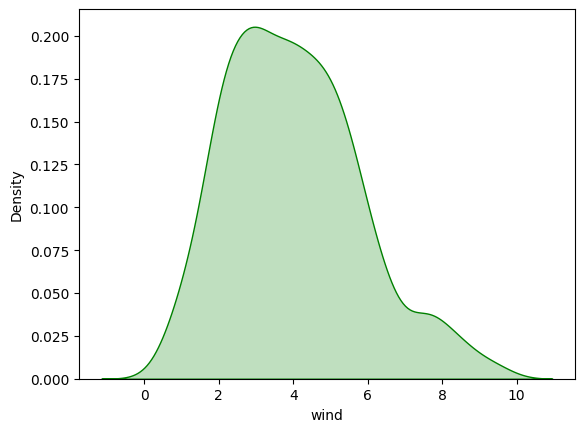

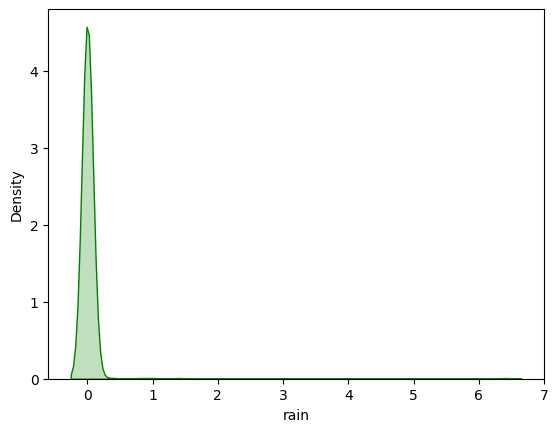

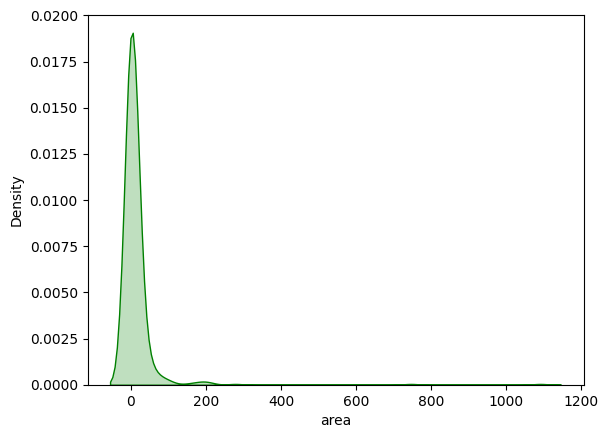

In [30]:
#kde plot
feat=df.iloc[:,2:-1]
for f in feat:
  sns.kdeplot(df[f],shade=True,color='green')
  plt.show()

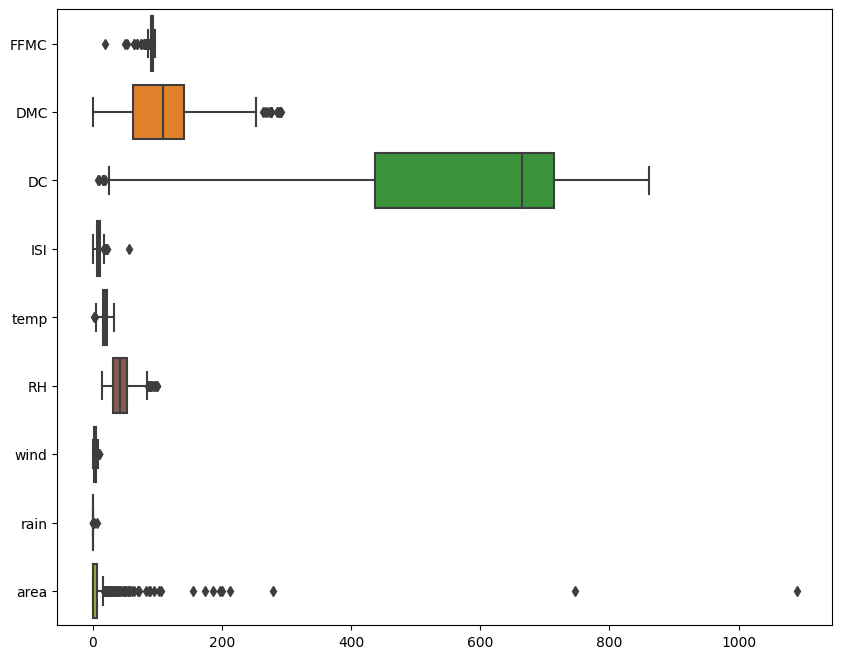

In [31]:
#detecting the outliers
#boxplot
plt.figure(figsize=(10,8))
sns.boxplot(df,orient='h')
plt.show()

# **Histogram**

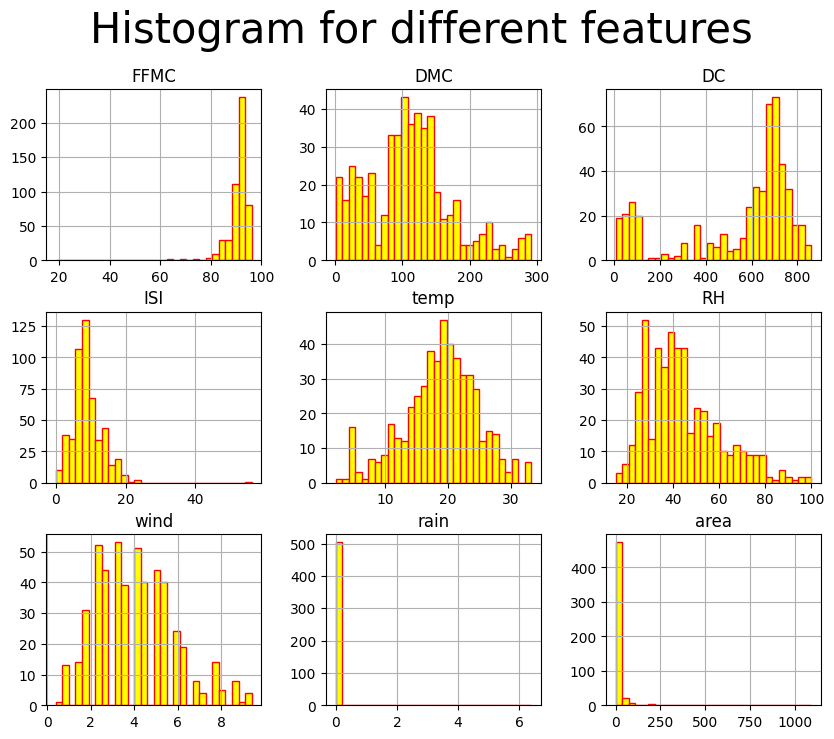

In [32]:
#Histogram for different feature
df.hist(bins=30,figsize=(10,8),rwidth=1,color='yellow',edgecolor='red')
plt.suptitle('Histogram for different features',ha='center',fontsize=30)
plt.show()

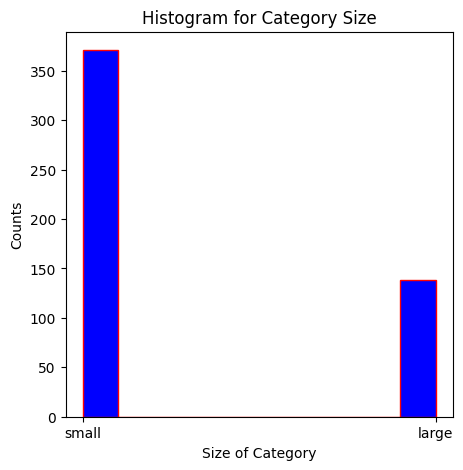

In [33]:
#histogram for size_category
plt.figure(figsize=(5,5))
plt.hist(df['size_category'],color='blue',rwidth=11,edgecolor='red')
plt.title('Histogram for Category Size')
plt.xlabel('Size of Category')
plt.ylabel('Counts')
plt.show()

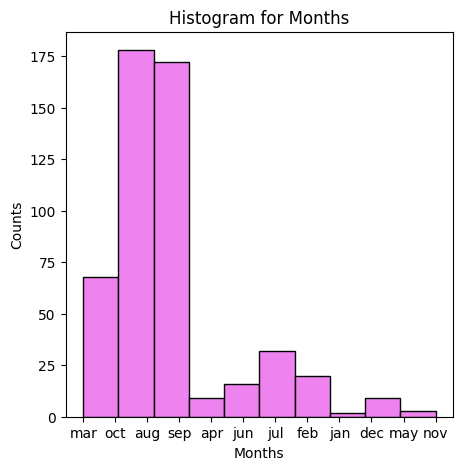

In [34]:
#histogram for month feature
plt.figure(figsize=(5,5))
plt.hist(df['month'],rwidth=1,color='violet',edgecolor='black')
plt.title('Histogram for Months')
plt.xlabel('Months')
plt.ylabel('Counts')
plt.show()

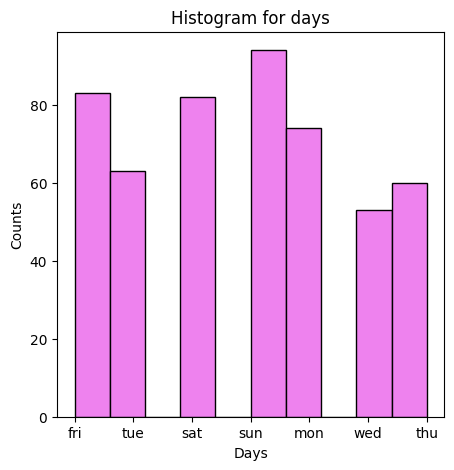

In [35]:
#histogram for Days features
plt.figure(figsize=(5,5))
plt.hist(df['day'],rwidth=1,color='violet',edgecolor='black')
plt.title('Histogram for days')
plt.xlabel('Days')
plt.ylabel('Counts')
plt.show()

# **Pie Chart**

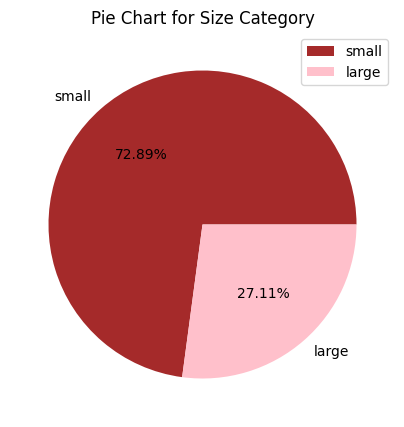

In [36]:
#pie chart
plt.figure(figsize=(5,5))
plt.pie(df['size_category'].value_counts(),labels=df['size_category'].unique(),autopct='%.2f%%',colors=['brown','pink'])
plt.title('Pie Chart for Size Category')
plt.legend()
plt.show()

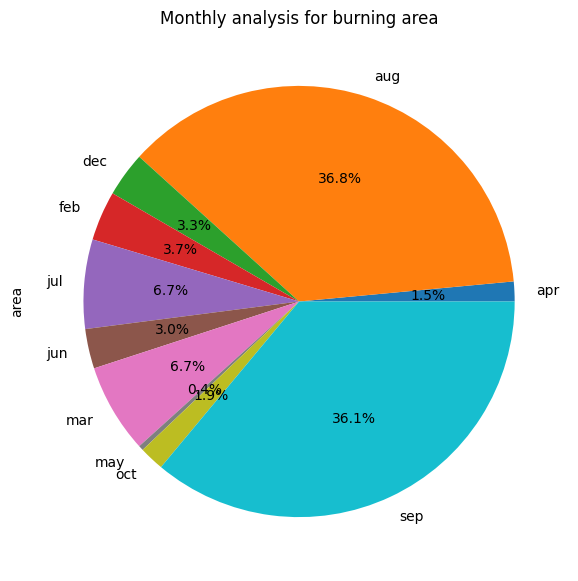

In [37]:
#pie chart showing area burnt due to fire
areaburnt=df[df['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis for burning area',figsize=(7,7),autopct='%0.1f%%')
plt.show()

In [38]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


# **Plot for BiVariate Analysis**

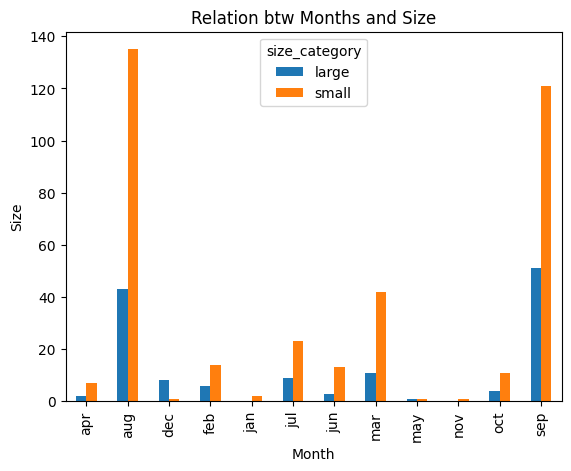

In [39]:
#Bar Plot
#relation between months and size_category features
pd.crosstab(df['month'],df['size_category']).plot(kind='bar')
plt.title('Relation btw Months and Size')
plt.xlabel('Month')
plt.ylabel('Size')
plt.show()

Text(0, 0.5, 'Size')

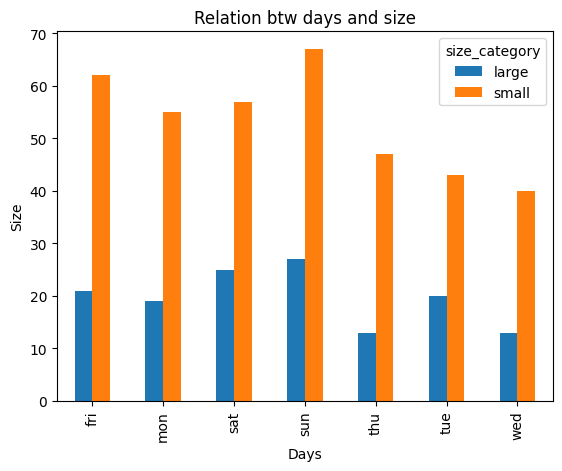

In [40]:
#Bar Plot
#relationship between days and size_category
pd.crosstab(df['day'],df['size_category']).plot(kind='bar')
plt.title('Relation btw days and size')
plt.xlabel('Days')
plt.ylabel('Size')

# **Plot for UniVariate Analysis**

Text(0.5, 1.0, 'Months')

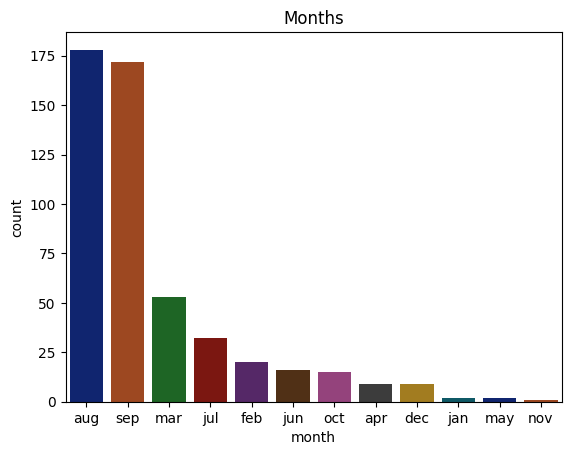

In [41]:
#Bar Plot for Month
sns.countplot(x='month',data=df,palette='dark',order=df['month'].value_counts().index)
plt.title('Months')

Text(0.5, 1.0, 'Days')

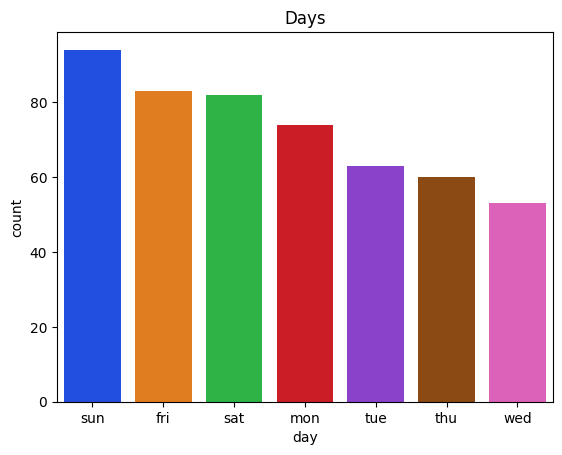

In [42]:
#Bar plot for Days
sns.countplot(x='day',data=df,palette='bright',order=df['day'].value_counts().index)
plt.title('Days')

Text(0.5, 1.0, 'Bar Plot Size Category')

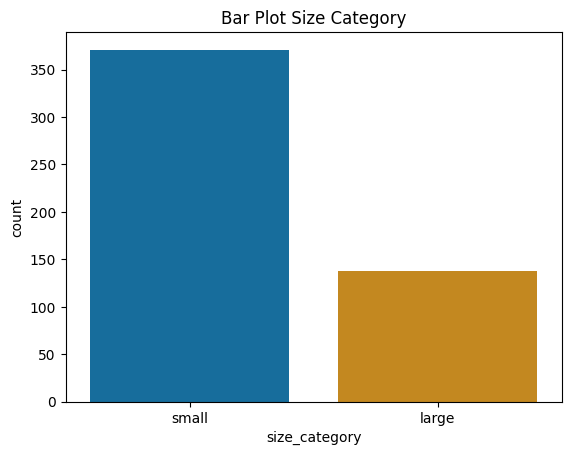

In [43]:
#Bar plot for size category
sns.countplot(x='size_category',data=df,palette='colorblind')
plt.title('Bar Plot Size Category')

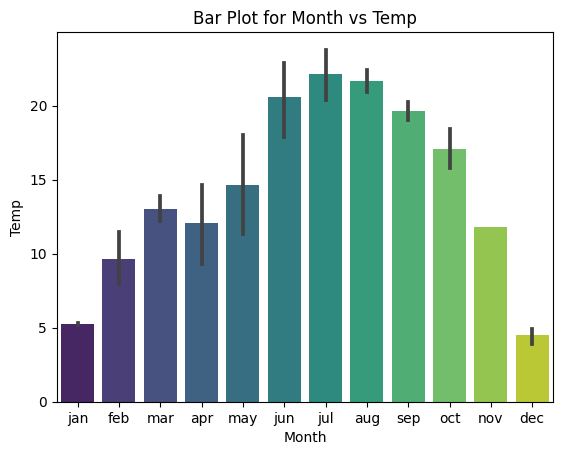

In [44]:
#Bar Plot
sns.barplot(x='month',y='temp',data=df,palette='viridis',order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title('Bar Plot for Month vs Temp')
plt.xlabel('Month')
plt.ylabel('Temp')
plt.show()

<Axes: >

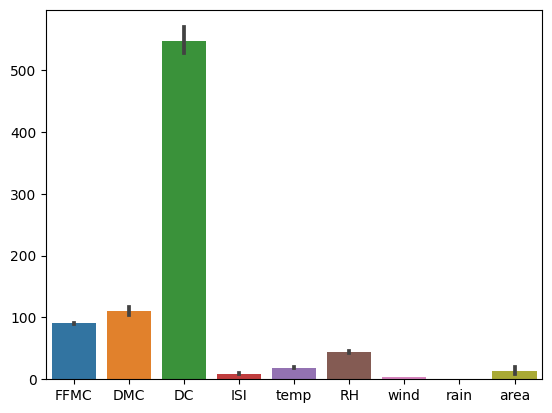

In [45]:
sns.barplot(df.iloc[:,:-1])

# **Label Encoding**

In [46]:
#we have to convert string into numerics
#It is perform by method called 'encoding'
#so Label Encoder is used to perform encoding

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [48]:
df[['month','day','size_category']]=df[['month','day','size_category']].apply(le.fit_transform)

In [49]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


# **Features Scaling**

In [50]:
#we have to reduce the scale of the features

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [52]:
df.iloc[:,:-1]=sc.fit_transform(df.iloc[:,:-1])

In [53]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,0.271858,-1.424495,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791,1
1,0.958019,1.178046,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791,1
2,0.958019,-0.383478,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791,1
3,0.271858,-1.424495,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791,1
4,0.271858,0.137030,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791,1


**Spliting into x and y**

In [54]:
#spliting into x and y
x=df.iloc[:,:-1]#independent feature
y=df.iloc[:,-1]#depedent feature

# **Training and Testing**

In [55]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.28,random_state=18)

In [56]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(366, 11)
(366,)
(143, 11)
(143,)


# **Neural Networks Model Building**

In [57]:
#importing neural networks
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [58]:
#create model
model=Sequential()
model.add(Dense(20,input_dim=11,activation='relu'))#input layer and layer1
model.add(Dense(10,activation='relu'))#layer2
model.add(Dense(10,activation='relu'))#layer3
model.add(Dense(1,activation='sigmoid'))#output layer

In [59]:
#compile model
adam=Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [60]:
#fitting the model
fit=model.fit(xtrain,ytrain,validation_split=0.25,batch_size=15,epochs=100)

Epoch 1/100
19/19 [==============================] - 1s 14ms/step - loss: 0.7257 - accuracy: 0.3540 - val_loss: 0.6916 - val_accuracy: 0.4674
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6733 - accuracy: 0.6496 - val_loss: 0.6542 - val_accuracy: 0.7500
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6305 - accuracy: 0.7153 - val_loss: 0.6276 - val_accuracy: 0.7391
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 0.5939 - accuracy: 0.7226 - val_loss: 0.6112 - val_accuracy: 0.7391
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5706 - accuracy: 0.7226 - val_loss: 0.6022 - val_accuracy: 0.7391
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5591 - accuracy: 0.7226 - val_loss: 0.5934 - val_accuracy: 0.7391
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5494 - accuracy: 0.7226 - val_loss: 0.5866 - val_accuracy: 0.7391
Epoch 8/100


In [61]:
#evaluate model for training dataset
score_train=model.evaluate(xtrain,ytrain)
print(model.metrics_names[1],':',score_train[1]*100)
print(model.metrics_names[0],':',score_train[0])

12/12 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9781
accuracy : 97.81420826911926
loss : 0.07016129046678543


In [62]:
#evaluate for testing dataset
score_test=model.evaluate(xtest,ytest)
print(model.metrics_names[1],':',score_test[1]*100)
print(model.metrics_names[0],':',score_test[0])

5/5 [==============================] - 0s 5ms/step - loss: 0.7331 - accuracy: 0.9371
accuracy : 93.7062919139862
loss : 0.7331323623657227


In [63]:
#list of all data in history
fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [64]:
#DataFrame for history
epochs=pd.DataFrame({'epochs':fit.epoch})
history=pd.DataFrame(fit.history)
fit_df=pd.concat([epochs,history],axis=1)
fit_df

,epochs,loss,accuracy,val_loss,val_accuracy
0,0,0.725658,0.354015,0.691625,0.467391
1,1,0.673323,0.649635,0.654209,0.750000
2,2,0.630544,0.715328,0.627633,0.739130
3,3,0.593922,0.722628,0.611211,0.739130
4,4,0.570591,0.722628,0.602181,0.739130
...,...,...,...,...,...
95,95,0.017192,1.000000,0.241157,0.913043
96,96,0.017830,1.000000,0.236235,0.913043
97,97,0.015703,1.000000,0.242700,0.891304
98,98,0.015748,1.000000,0.234030,0.913043


In [65]:
#visualization training history

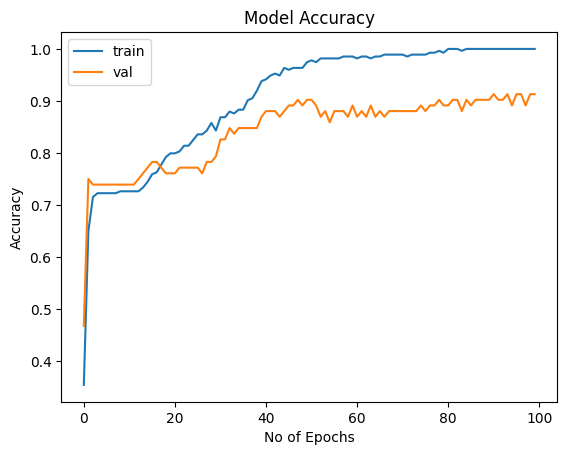

In [66]:
#summarize of training accuracy plot
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No of Epochs')
plt.legend(['train','val'],loc='upper left')
plt.show()

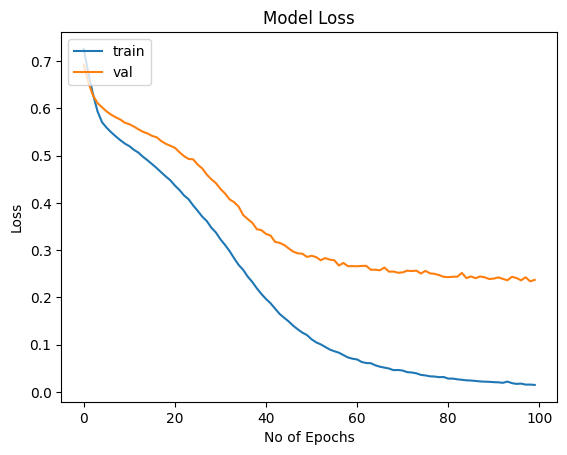

In [67]:
#summarize of training loss plot
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No of Epochs')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                240       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 571 (2.23 KB)
Trainable params: 571 (2.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
#Accuracy for train and testing data
print('Training Data','--->>','%s:%.2f%%'%(model.metrics_names[1],score_train[1]*100))
print('Testing Data','--->>','%s:%.2f%%'%(model.metrics_names[1],score_test[1]*100))

Training Data --->> accuracy:97.81%
Testing Data --->> accuracy:93.71%


In [70]:
#Accuracy is 97%

# **Hyperparameters Tuning**

# **GridSearchCV Models**

# **1.Hyperparameter Tuning:Batch Size and Epochs**

In [71]:
!pip install scikeras

In [72]:
!pip install tensorflow

In [73]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from scikeras.wrappers import KerasClassifier

In [74]:
#create model1
def create_model():
  model=Sequential()
  model.add(Dense(20,input_dim=11,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(12,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

In [75]:
#create GridSearchCV model1
kc=KerasClassifier(build_fn=create_model,verbose=10) #model building
params=dict(batch_size=[10,15,20,30],epochs=[50,100,150,200]) #defining the parameters
grid=GridSearchCV(estimator=kc,param_grid=params,cv=KFold(),verbose=10)
grid.fit(x,y)

Streaming output truncated to the last 5000 lines.
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV 4/5; 9/16] END ....batch_size=20, epochs=50;, score=0.961 total time=   2.8s
[CV 5/5; 9/16] START batch_size=20, epochs=50...................................
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoc

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KerasClassifier(build_fn=<function create_model at 0x7a6fe0d93490>, verbose=10),
             param_grid={'batch_size': [10, 15, 20, 30],
                         'epochs': [50, 100, 150, 200]},
             verbose=10)

In [76]:
print(grid.best_score_)
print(grid.best_params_)

0.9783343040186372
{'batch_size': 10, 'epochs': 100}


In [77]:
print('Best:{} , Using:{}'.format(grid.best_score_,grid.best_params_))

Best:0.9783343040186372 , Using:{'batch_size': 10, 'epochs': 100}


In [78]:
#Accuracy is 97%

# **2.Hyperparameter Tuning:Learning Rate and Dropout rate**

In [79]:
#create model2
def create_model2(learning_rate,dropout_rate):
  model2=Sequential()
  model2.add(Dense(20,input_dim=11,kernel_initializer='uniform',activation='relu'))
  model2.add(Dropout(dropout_rate))
  model2.add(Dense(10,kernel_initializer='uniform',activation='relu'))
  model2.add(Dropout(dropout_rate))
  model2.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model2.add(Dropout(dropout_rate))
  model2.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

  adam2=Adam(learning_rate=learning_rate)
  model2.compile(loss='binary_crossentropy',optimizer=adam2,metrics=['accuracy'])
  return model2

In [80]:
#create GridSearchCV model2
kc2=KerasClassifier(build_fn=create_model2,verbose=0,batch_size=15,epochs=50,dropout_rate=0.0,learning_rate=0.1)
learning_rate=[0.1,0.01,0.001]
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
params2=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)
grid2=GridSearchCV(estimator=kc2,param_grid=params2,cv=KFold(),verbose=10)
grid2.fit(x,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START dropout_rate=0.0, learning_rate=0.1........................
[CV 1/5; 1/18] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   3.4s
[CV 2/5; 1/18] START dropout_rate=0.0, learning_rate=0.1........................
[CV 2/5; 1/18] END dropout_rate=0.0, learning_rate=0.1;, score=0.980 total time=   3.3s
[CV 3/5; 1/18] START dropout_rate=0.0, learning_rate=0.1........................
[CV 3/5; 1/18] END dropout_rate=0.0, learning_rate=0.1;, score=0.510 total time=   5.5s
[CV 4/5; 1/18] START dropout_rate=0.0, learning_rate=0.1........................
[CV 4/5; 1/18] END dropout_rate=0.0, learning_rate=0.1;, score=0.676 total time=   6.5s
[CV 5/5; 1/18] START dropout_rate=0.0, learning_rate=0.1........................
[CV 5/5; 1/18] END dropout_rate=0.0, learning_rate=0.1;, score=0.693 total time=  12.6s
[CV 1/5; 2/18] START dropout_rate=0.0, learning_rate=0.01.......................
[CV 1/5; 2/18

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KerasClassifier(batch_size=15, build_fn=<function create_model2 at 0x7a6fe0bd3d00>, dropout_rate=0.0, epochs=50, learning_rate=0.1, verbose=0),
             param_grid={'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'learning_rate': [0.1, 0.01, 0.001]},
             verbose=10)

In [81]:
print(grid2.best_score_)
print(grid2.best_params_)

0.9744127353911862
{'dropout_rate': 0.1, 'learning_rate': 0.001}


In [82]:
print('Best:{} , Using:{}'.format(grid2.best_score_,grid2.best_params_))

Best:0.9744127353911862 , Using:{'dropout_rate': 0.1, 'learning_rate': 0.001}


In [83]:
#Accuracy is 97%

# **3.Hyperparameter Tuning:Activation Function and Kernel Initializer**

In [84]:
#create model3
def create_model3(activation,initializer):
  model3=Sequential()
  model3.add(Dense(12,input_dim=11,kernel_initializer=initializer,activation=activation))
  model3.add(Dropout(0.1))
  model3.add(Dense(10,kernel_initializer=initializer,activation=activation))
  model3.add(Dropout(0.1))
  model3.add(Dense(8,kernel_initializer=initializer,activation=activation))
  model3.add(Dropout(0.1))
  model3.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

  adam3=Adam(learning_rate=0.001)
  model3.compile(loss='binary_crossentropy',optimizer=adam3,metrics=['accuracy'])
  return model3

In [85]:
#create GridSearchCV model3
kc3=KerasClassifier(build_fn=create_model3,verbose=0,batch_size=10,epochs=50,activation='relu',initializer='uniform')
activation=['relu','tanh','linear','softmax','sigmoid']
initializer=['uniform','normal','zero','random']
params3=dict(initializer=initializer,activation=activation)
grid3=GridSearchCV(estimator=kc3,param_grid=params3,cv=KFold(),verbose=10)
grid3.fit(x,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START activation=relu, initializer=uniform.......................
[CV 1/5; 1/20] END activation=relu, initializer=uniform;, score=1.000 total time=   5.0s
[CV 2/5; 1/20] START activation=relu, initializer=uniform.......................
[CV 2/5; 1/20] END activation=relu, initializer=uniform;, score=0.980 total time=   4.2s
[CV 3/5; 1/20] START activation=relu, initializer=uniform.......................
[CV 3/5; 1/20] END activation=relu, initializer=uniform;, score=0.980 total time=   5.9s
[CV 4/5; 1/20] START activation=relu, initializer=uniform.......................
[CV 4/5; 1/20] END activation=relu, initializer=uniform;, score=0.961 total time=   5.9s
[CV 5/5; 1/20] START activation=relu, initializer=uniform.......................
[CV 5/5; 1/20] END activation=relu, initializer=uniform;, score=0.941 total time=   5.9s
[CV 1/5; 2/20] START activation=relu, initializer=normal........................
[CV 1/5

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KerasClassifier(activation='relu', batch_size=10, build_fn=<function create_model3 at 0x7a6fe17a8ee0>, epochs=50, initializer='uniform', verbose=0),
             param_grid={'activation': ['relu', 'tanh', 'linear', 'softmax',
                                        'sigmoid'],
                         'initializer': ['uniform', 'normal', 'zero',
                                         'random']},
             verbose=10)

In [86]:
print(grid3.best_score_)
print(grid3.best_params_)

0.9881964667054941
{'activation': 'tanh', 'initializer': 'uniform'}


In [87]:
print('Best:{} , Using:{}'.format(grid3.best_score_,grid3.best_params_))

Best:0.9881964667054941 , Using:{'activation': 'tanh', 'initializer': 'uniform'}


In [88]:
#Accuracy is 98%

# **4.Hyperparameter Tuning:Number of Neurons in activation layer**

In [89]:
#create model4
def create_model4(neuron1,neuron2,neuron3):
  model4=Sequential()
  model4.add(Dense(neuron1,input_dim=11,kernel_initializer='uniform',activation='relu'))
  model4.add(Dropout(0.1))
  model4.add(Dense(neuron2,kernel_initializer='uniform',activation='relu'))
  model4.add(Dropout(0.1))
  model4.add(Dense(neuron3,kernel_initializer='uniform',activation='relu'))
  model4.add(Dropout(0.1))
  model4.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

  adam4=Adam(learning_rate=0.001)
  model4.compile(loss='binary_crossentropy',optimizer=adam4,metrics=['accuracy'])
  return model4

In [90]:
#create GridSearchCV model4
kc4=KerasClassifier(build_fn=create_model4,verbose=0,batch_size=20,epochs=70,neuron1=10,neuron2=7,neuron3=2)
neuron1=[10,12,15]
neuron2=[7,10,12]
neuron3=[2,4,7]
params4=dict(neuron1=neuron1,neuron2=neuron2,neuron3=neuron3)
grid4=GridSearchCV(estimator=kc4,param_grid=params4,cv=KFold(),verbose=10)
grid4.fit(x,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START neuron1=10, neuron2=7, neuron3=2...........................
[CV 1/5; 1/27] END neuron1=10, neuron2=7, neuron3=2;, score=1.000 total time=   3.7s
[CV 2/5; 1/27] START neuron1=10, neuron2=7, neuron3=2...........................
[CV 2/5; 1/27] END neuron1=10, neuron2=7, neuron3=2;, score=0.951 total time=   3.3s
[CV 3/5; 1/27] START neuron1=10, neuron2=7, neuron3=2...........................
[CV 3/5; 1/27] END neuron1=10, neuron2=7, neuron3=2;, score=0.510 total time=   3.2s
[CV 4/5; 1/27] START neuron1=10, neuron2=7, neuron3=2...........................
[CV 4/5; 1/27] END neuron1=10, neuron2=7, neuron3=2;, score=0.931 total time=   5.8s
[CV 5/5; 1/27] START neuron1=10, neuron2=7, neuron3=2...........................
[CV 5/5; 1/27] END neuron1=10, neuron2=7, neuron3=2;, score=0.693 total time=   5.8s
[CV 1/5; 2/27] START neuron1=10, neuron2=7, neuron3=4...........................
[CV 1/5; 2/27] END neuron1=

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KerasClassifier(batch_size=20, build_fn=<function create_model4 at 0x7a6fe0d92e60>, epochs=70, neuron1=10, neuron2=7, neuron3=2, verbose=0),
             param_grid={'neuron1': [10, 12, 15], 'neuron2': [7, 10, 12],
                         'neuron3': [2, 4, 7]},
             verbose=10)

In [91]:
print(grid4.best_score_)
print(grid4.best_params_)

0.9803145020384392
{'neuron1': 15, 'neuron2': 10, 'neuron3': 7}


In [92]:
print('Best:{}  ;  using:{}'.format(grid4.best_score_,grid4.best_params_))

Best:0.9803145020384392  ;  using:{'neuron1': 15, 'neuron2': 10, 'neuron3': 7}


In [93]:
#Accuracy is 98%

In [94]:
###completed/////////